In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load training CSV (with headers)
df = pd.read_csv("/content/drive/MyDrive/mood/emotion_featuresset1.csv")

# Separate features and labels
X_train = df.drop("Emotion", axis=1)
y_train = df["Emotion"]

# Encode emotion labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train_encoded)

RandomForestClassifier(random_state=42)

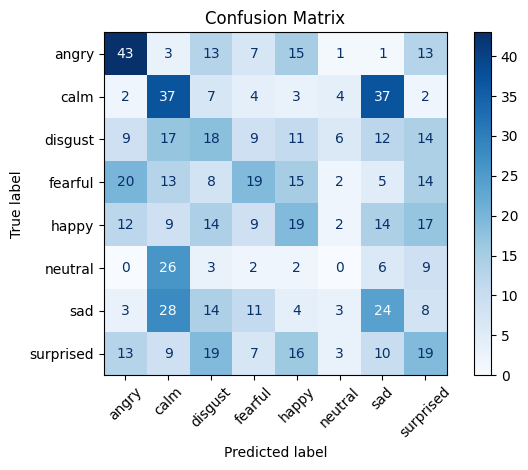

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load test data
df_test = pd.read_csv("/content/drive/MyDrive/mood/emotion_featuresset2.csv")

# Separate features and labels
X_test = df_test.drop("Emotion", axis=1)
y_test = df_test["Emotion"]

# Encode labels (same encoder used during training)
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Predict using the trained model
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Load training CSV (with headers)
df = pd.read_csv("/content/drive/MyDrive/mood/emotion_featuresset1.csv")

# Separate features and labels
X_train = df.drop("Emotion", axis=1)
y_train = df["Emotion"]

# Encode emotion labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Train SVM classifier
clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
clf.fit(X_train, y_train_encoded)

SVC(random_state=42)

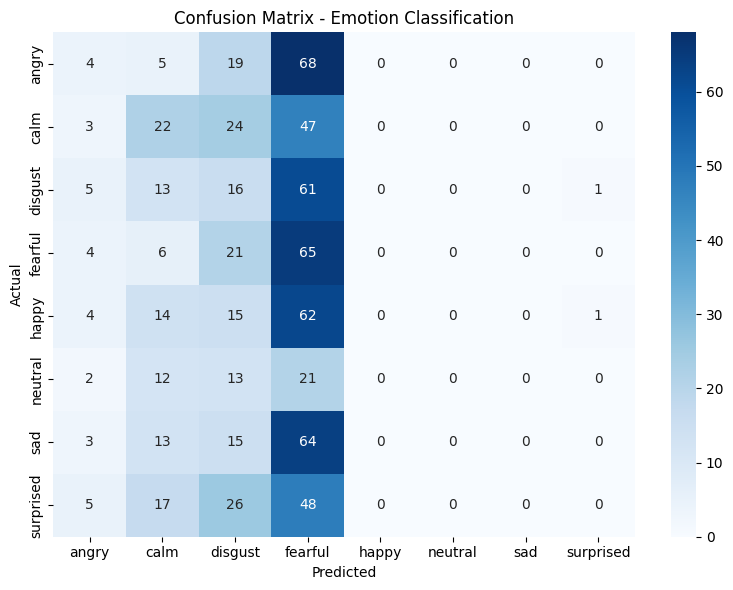

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load test data
df_test = pd.read_csv("/content/drive/MyDrive/mood/emotion_featuresset2.csv")

# Separate features and labels
X_test = df_test.drop("Emotion", axis=1)
y_test = df_test["Emotion"]

# Encode labels
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Predict using trained SVM model
y_pred = clf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Emotion Classification")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load training data
df = pd.read_csv("/content/drive/MyDrive/mood/emotion_featuresset1.csv")

# Separate features and labels
X_train = df.drop("Emotion", axis=1)
y_train = df["Emotion"]

# Encode emotion labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Scale features for MLP (important!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define and train MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu',
                    solver='lbfgs', max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train_encoded)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42,
              solver='lbfgs')

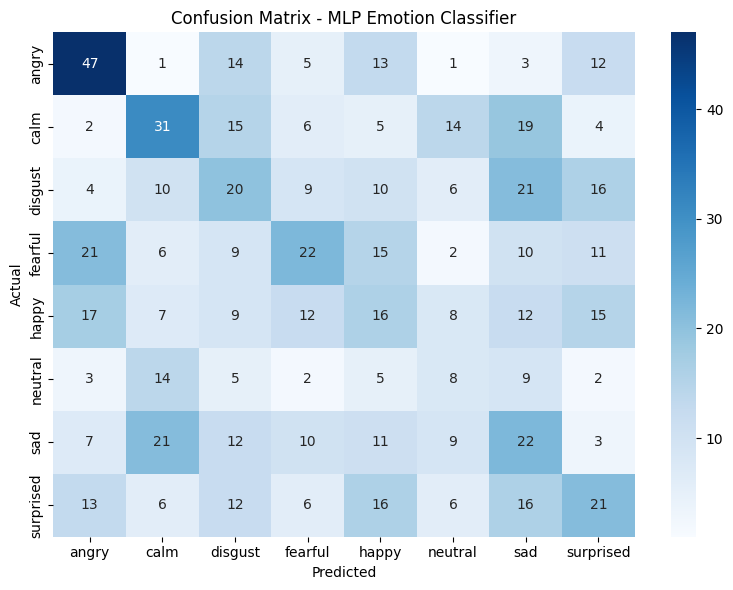

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load test data
df_test = pd.read_csv("/content/drive/MyDrive/mood/emotion_featuresset2.csv")

# Separate features and labels
X_test = df_test.drop("Emotion", axis=1)
y_test = df_test["Emotion"]

# Encode labels (same way as training)
le_test = LabelEncoder()
y_test_encoded = le_test.fit_transform(y_test)

# Scale test features using the same scaler
X_test_scaled = scaler.transform(X_test)

# Predict with trained MLP
y_pred = mlp.predict(X_test_scaled)

# Generate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_test.classes_,
            yticklabels=le_test.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLP Emotion Classifier")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load test data
df_test = pd.read_csv("/content/drive/MyDrive/mood/emotion_featuresset2.csv")
X_test = df_test.drop("Emotion", axis=1)
y_test = df_test["Emotion"]

# Encode labels
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Scale features (same scaler used during training)
X_test_scaled = scaler.transform(X_test)

# Predict using trained model
y_pred = mlp.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Calculate TP percentage per class
tp_percentages = []
for i in range(len(cm)):
    tp = cm[i, i]
    total = cm[i].sum()
    percent = (tp / total) * 100 if total > 0 else 0
    tp_percentages.append(percent)

# Display results
for label, tp_pct in zip(le.classes_, tp_percentages):
    print(f"{label}: {tp_pct:.2f}% True Positives")

angry: 48.96% True Positives
calm: 32.29% True Positives
disgust: 20.83% True Positives
fearful: 22.92% True Positives
happy: 16.67% True Positives
neutral: 16.67% True Positives
sad: 23.16% True Positives
surprised: 21.88% True Positives


In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/mood/emotion_featuresset1.csv")

# Separate features and labels
X = df.drop("Emotion", axis=1)
y = df["Emotion"]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Build MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

model.save("/content/drive/MyDrive/mood/emotion_mlp_model.h5")

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1046 - loss: 2.0876 - val_accuracy: 0.1944 - val_loss: 2.0023
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2440 - loss: 1.9327 - val_accuracy: 0.2292 - val_loss: 1.9749
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2743 - loss: 1.8654 - val_accuracy: 0.2014 - val_loss: 1.9624
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2677 - loss: 1.8584 - val_accuracy: 0.2361 - val_loss: 1.9552
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2581 - loss: 1.8508 - val_accuracy: 0.2292 - val_loss: 1.9474
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2723 - loss: 1.8356 - val_accuracy: 0.2361 - val_loss: 1.9435
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2793 - loss: 1.8034 - val_accuracy: 0.2431 - val_loss: 1.9393
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3168 - loss: 1.7353 - val_accuracy: 0.2292 - val_loss: 1.9

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Convert probabilities to class indices
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - MLP Emotion Classifier")
plt.tight_layout()
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ValueError: Mix of label input types (string and number)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Load external test CSV
df_test = pd.read_csv("/content/drive/MyDrive/mood/emotion_featuresset2.csv")

# Separate features and labels
X_test = df_test.drop("Emotion", axis=1)
y_test = df_test["Emotion"]

# Encode labels using same encoder logic
le_test = LabelEncoder()
y_test_encoded = le_test.fit_transform(y_test)

# Scale features using the same scaler from training
X_test_scaled = scaler.transform(X_test)

# Predict using trained MLP model
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)

# Calculate TP percentage per class
tp_percentages = []
for i in range(len(cm)):
    tp = cm[i, i]
    total = cm[i].sum()
    percent = (tp / total) * 100 if total > 0 else 0
    tp_percentages.append(percent)

# Display results
for label, tp_pct in zip(le_test.classes_, tp_percentages):
    print(f"{label}: {tp_pct:.2f}% True Positive Accuracy")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
angry: 52.08% True Positive Accuracy
calm: 82.29% True Positive Accuracy
disgust: 15.62% True Positive Accuracy
fearful: 19.79% True Positive Accuracy
happy: 17.71% True Positive Accuracy
neutral: 0.00% True Positive Accuracy
sad: 16.84% True Positive Accuracy
surprised: 33.33% True Positive Accuracy
